<a href="https://colab.research.google.com/github/BAravind-5/Task_14/blob/main/Task_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True)
}

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM (RBF)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

In [7]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.989011,0.982456,0.986111,0.986111,0.986111
1,Decision Tree,0.993407,0.921053,0.956522,0.916667,0.936170
2,Random Forest,1.000000,0.956140,0.958904,0.972222,0.965517
3,SVM (RBF),0.982418,0.982456,0.986111,0.986111,0.986111


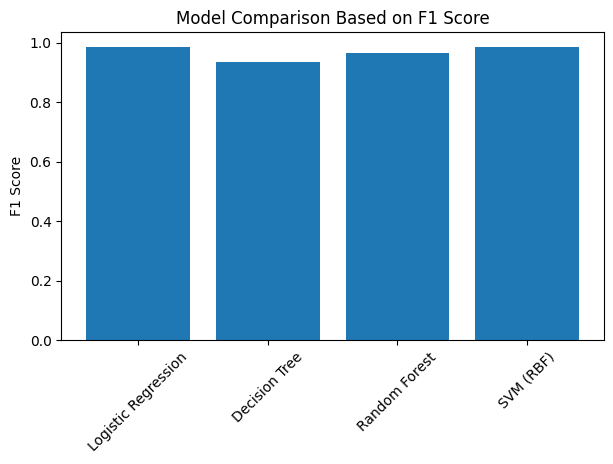

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(results_df["Model"], results_df["F1 Score"])
plt.xticks(rotation=45)
plt.ylabel("F1 Score")
plt.title("Model Comparison Based on F1 Score")
plt.show()

Overfitting Detection:

Models with very high training accuracy but lower test accuracy
indicate overfitting. Random Forest and Decision Tree are more
prone to this if not controlled.

In [10]:
results_df.sort_values(by="Recall", ascending=False)

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.989011,0.982456,0.986111,0.986111,0.986111
3,SVM (RBF),0.982418,0.982456,0.986111,0.986111,0.986111
2,Random Forest,1.000000,0.956140,0.958904,0.972222,0.965517
1,Decision Tree,0.993407,0.921053,0.956522,0.916667,0.936170


In [13]:
import joblib

best_model = models["SVM (RBF)"]

joblib.dump(best_model, "best_model_task14.pkl")

['best_model_task14.pkl']